In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r'C:\Users\rashi\Downloads\DSData-master\DSData-master\Telecom_customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

there are 7043 rows and 21 columns in this dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there are 1 column of float data , 2 column of int data and 18 columns of object data

In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# eda

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

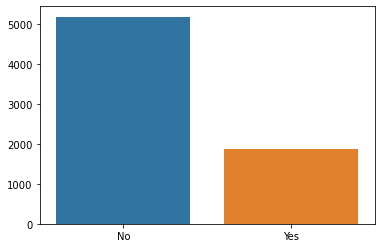

In [10]:
y = data["Churn"].value_counts()
sns.barplot(y.index, y.values)

In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

1869 are yes under churn column and 5174 are no

In [12]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

there are more males than females in the given dataset

In [13]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

there are less senior citizen than others

<AxesSubplot:xlabel='gender', ylabel='count'>

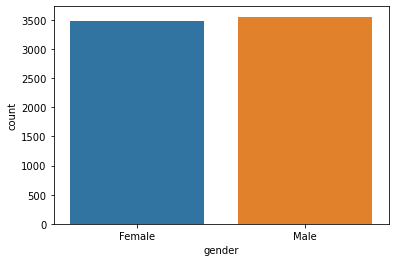

In [14]:
sns.countplot(x='gender', data=data)

our data is balanced

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

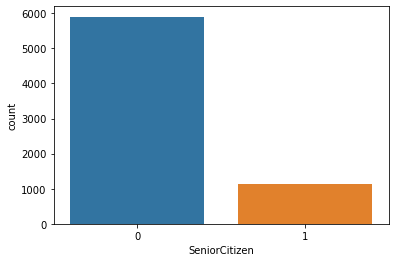

In [15]:
sns.countplot(x='SeniorCitizen', data=data)


<AxesSubplot:xlabel='Dependents', ylabel='count'>

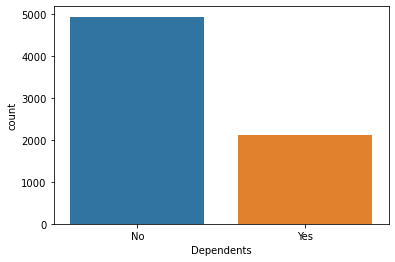

In [16]:
sns.countplot(x='Dependents', data=data)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

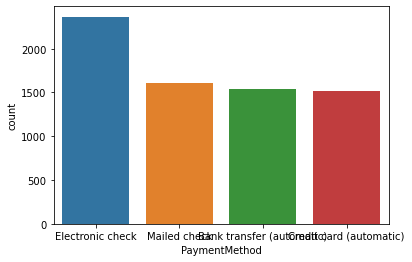

In [17]:
sns.countplot(x='PaymentMethod', data=data)

most of the people go for electronic check for payment method

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

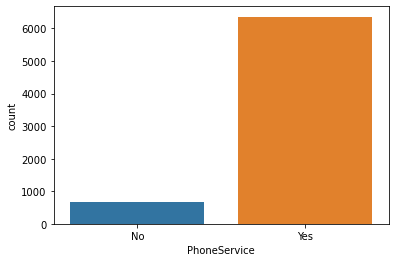

In [18]:
sns.countplot(x='PhoneService', data=data)

most of the people use phoneservice 

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

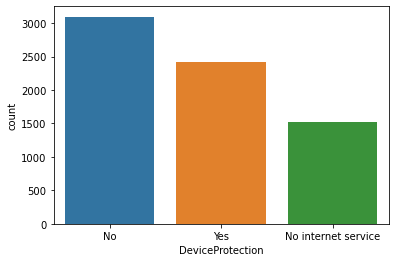

In [19]:
sns.countplot(x='DeviceProtection', data=data)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

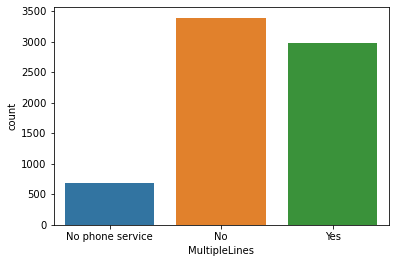

In [20]:
sns.countplot(x='MultipleLines', data=data)

In [24]:
y_True = data["Churn"][data["Churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / data["Churn"].shape[0]) * 100 ))

Churn Percentage = 0.0


In [25]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender'>

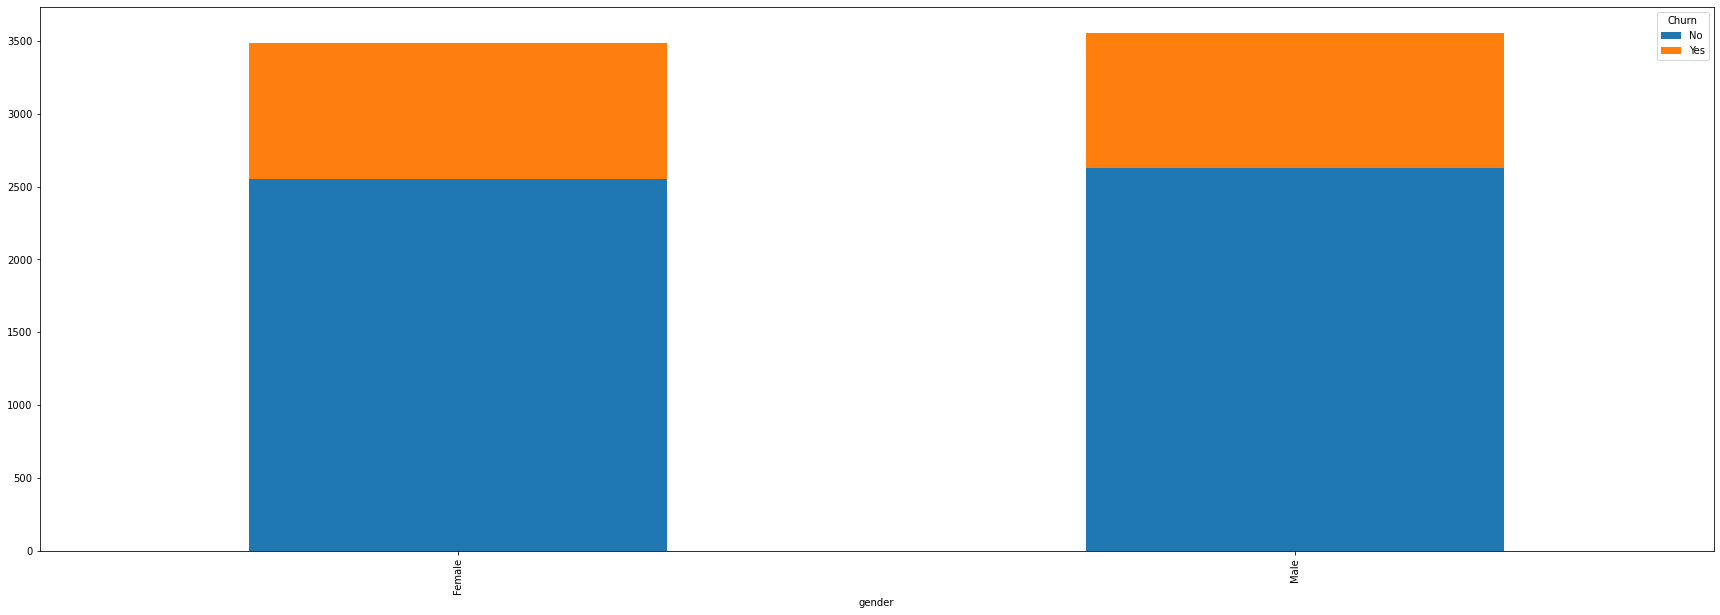

In [28]:
data.groupby(["gender", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

<AxesSubplot:xlabel='Dependents'>

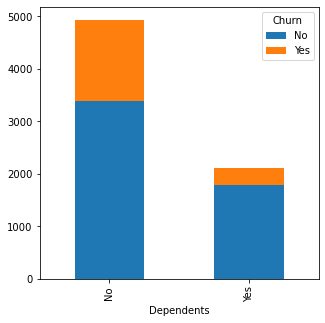

In [30]:
data.groupby(["Dependents", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<AxesSubplot:xlabel='DeviceProtection'>

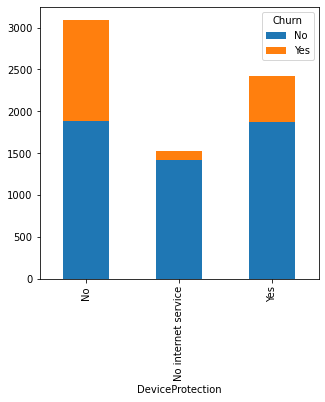

In [31]:
data.groupby(["DeviceProtection", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<AxesSubplot:xlabel='PhoneService'>

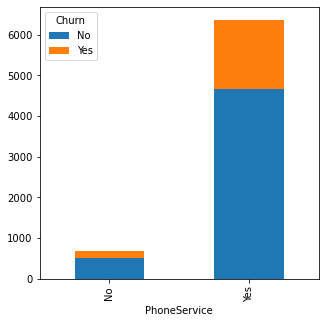

In [33]:
data.groupby(["PhoneService", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

In [37]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [40]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

data['customerID'] = label_encoder.fit_transform(data['customerID'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['TotalCharges'] = label_encoder.fit_transform(data['TotalCharges'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

print (data.dtypes)

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object


we have encoded our data

In [41]:
print (data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


Create response vector

In [42]:
y = data['Churn'].values.astype(np.int)
y.size

7043

Drop superflous columns


In [43]:
# data = data.drop(["Id","Churn"], axis = 1, inplace=True)
data.drop(["customerID","Churn"], axis = 1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


Build feature matrix



In [44]:
X = data.values.astype(np.float)
print(X)
X.shape

[[0.0000e+00 0.0000e+00 1.0000e+00 ... 2.0000e+00 2.9850e+01 2.5050e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.0000e+00 5.6950e+01 1.4660e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 3.0000e+00 5.3850e+01 1.5700e+02]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 2.0000e+00 2.9600e+01 2.9940e+03]
 [1.0000e+00 1.0000e+00 1.0000e+00 ... 3.0000e+00 7.4400e+01 2.6600e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 1.0565e+02 5.4070e+03]]


(7043, 19)

Standardize Feature Matrix values


In [45]:

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

# Split Train/Test Validation Data


We need to adopt Stratified Cross Validation - Since the Response values are not balanced



In [46]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

# Build Models and Train


In [47]:
# create classifiers
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()



In [48]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')



In [49]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)



In [50]:
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()


In [51]:

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs')

In [52]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:  0.80
Support vector machine(SVM):   0.80
Random Forest Classifier:      0.78
K Nearest Neighbor Classifier: 0.76
Logistic Regression:           0.80


our best model is Gradient Boosting Classifier: with 80%

# Model Evaluation

Gradient Boosting Classifier


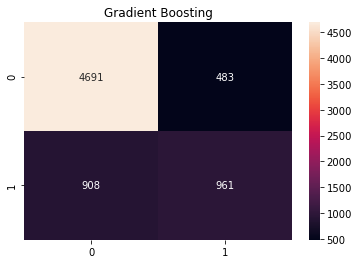

In [53]:

grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);


Support Vector Machines


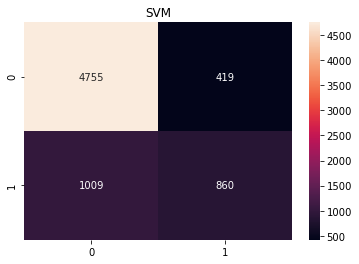

In [54]:

svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);


Random Forest


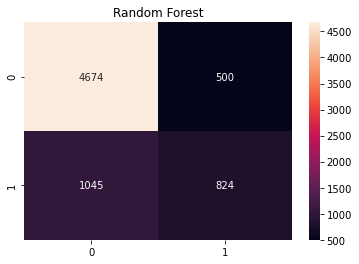

In [55]:

random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);


Classification Report


In [56]:

print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      5174
           1       0.66      0.52      0.58      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.71      0.73      7043
weighted avg       0.79      0.80      0.79      7043


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      5174
           1       0.67      0.46      0.55      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.69      0.71      7043
weighted avg       0.78      0.80      0.78      7043


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      5174
           1       0.62      0.45      0.52      1869

    accuracy                           0.78      7043
   macro avg       0.72      0.68     

In [57]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[1.31223180e-03 7.96623152e-03 1.38155851e-08 2.45251633e-03
 1.80713297e-01 1.49665632e-03 8.25848060e-03 1.29360435e-02
 7.96511641e-02 7.86383036e-03 3.78489471e-04 5.83196870e-02
 1.18516379e-03 5.73600118e-03 4.19513375e-01 1.85196068e-02
 1.91646708e-02 1.27367672e-01 4.71648698e-02]


<AxesSubplot:>

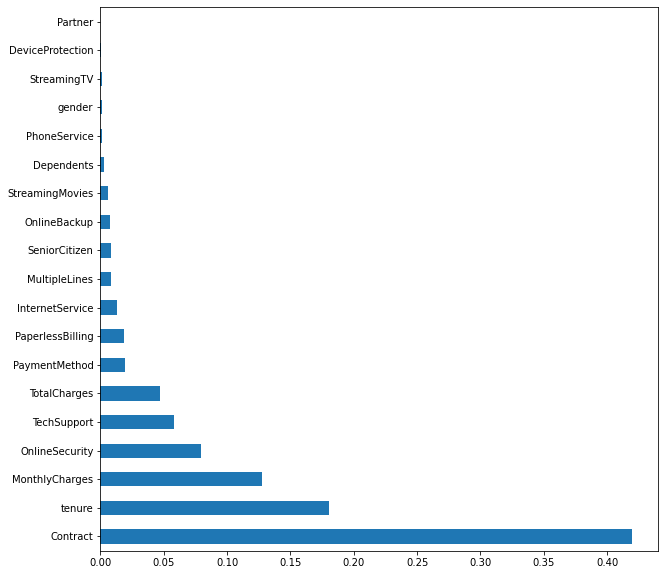

In [59]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=data.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))

In [61]:
import pickle
file = open('Customer_Churn_Analysis.pkl','wb')
pickle.dump(feat_importances,file)